# Live Cattle, Feeder Cattle, Corn Futures

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import src

import warnings
warnings.filterwarnings('ignore')

/Users/ericostring/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/ericostring/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<AxesSubplot:title={'center':'Live Cattle Futures ($/cwt)'}>

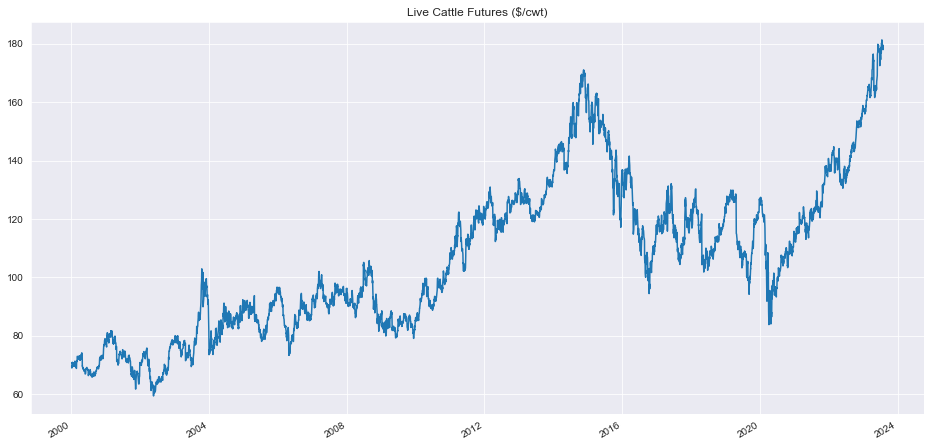

In [2]:
live_cattle_futures = pd.read_csv('../csv/live_cattle_futures.csv')
live_cattle_futures = src.clean_tv_data(live_cattle_futures)
live_cattle_futures.plot(title='Live Cattle Futures ($/cwt)')

<AxesSubplot:title={'center':'Feeder Cattle Futures ($/cwt)'}>

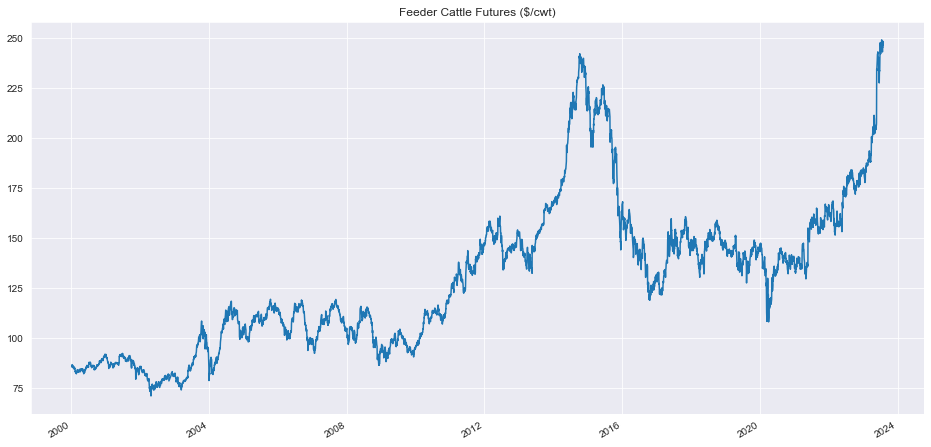

In [3]:
feeder_cattle_futures = pd.read_csv('../csv/feeder_cattle_futures.csv')
feeder_cattle_futures = src.clean_tv_data(feeder_cattle_futures)
feeder_cattle_futures.plot(title='Feeder Cattle Futures ($/cwt)')

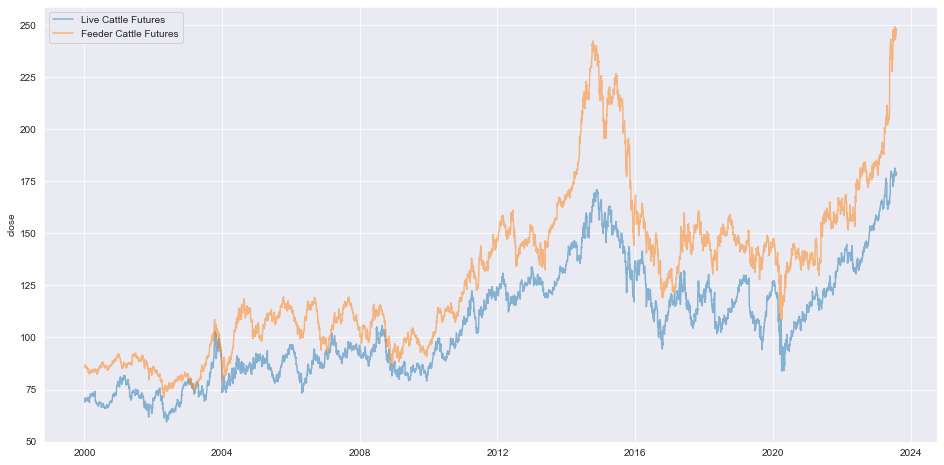

In [4]:
src.lineplot_mult_same_axis(
    live_cattle_futures,
    feeder_cattle_futures,
    'Live Cattle Futures',
    'Feeder Cattle Futures'
)

- Feeder cattle inflation adjusted prices are consistently higher than live cattle's per cwt in past +20 years (as expected)

<AxesSubplot:title={'center':'Feeder Cattle Futures - Live Cattle Futures ($/cwt)'}>

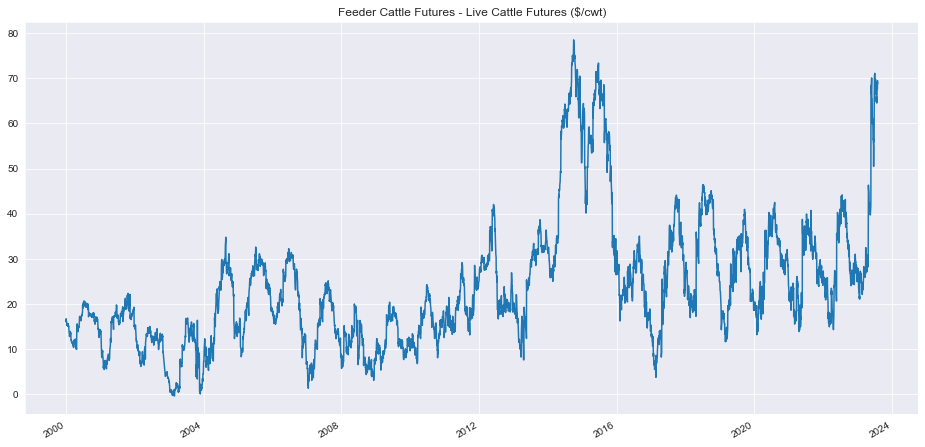

In [7]:
diff = (feeder_cattle_futures - live_cattle_futures).dropna()
diff.plot(title='Feeder Cattle Futures - Live Cattle Futures ($/cwt)')

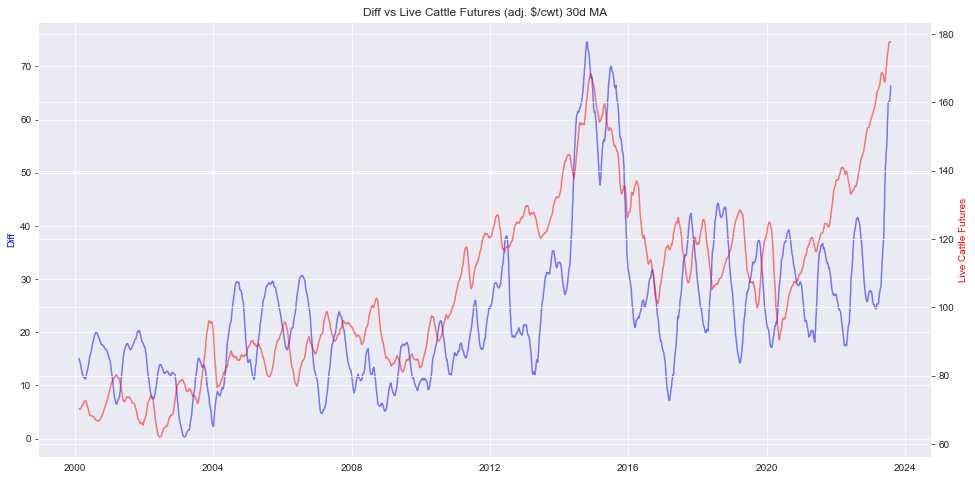

In [8]:
src.lineplot_2_own_axis(
    diff.rolling(30).mean(),
    live_cattle_futures.rolling(30).mean(),
    label1 = 'Diff',
    label2 = 'Live Cattle Futures',
    title='Diff vs Live Cattle Futures (adj. $/cwt) 30d MA'
    )

In [9]:
round(diff.corr(live_cattle_futures),2)

0.66

- The price difference between feeder cattle and live cattle is positively correlated with live cattle futures price
- Look at percentage change difference next

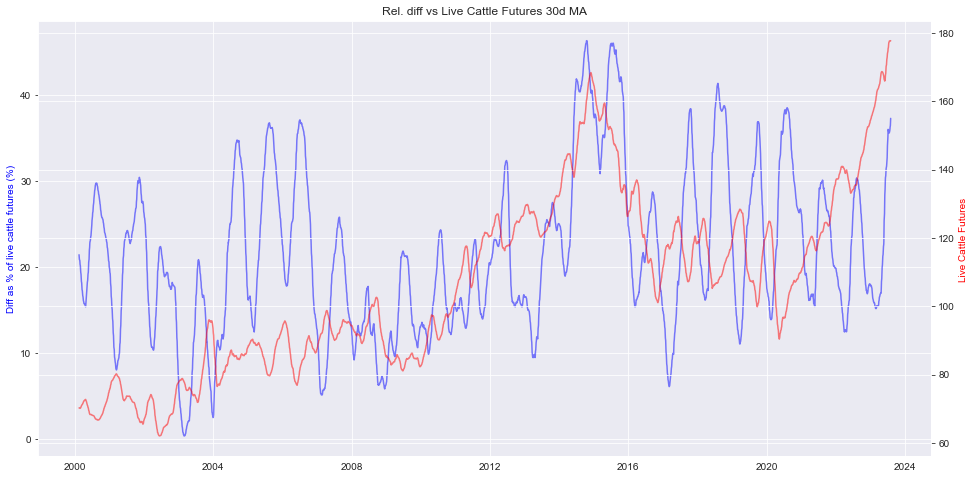

In [11]:
diff_as_pct = (( (feeder_cattle_futures - live_cattle_futures) / live_cattle_futures)*100).dropna()

src.lineplot_2_own_axis(
    diff_as_pct.rolling(30).mean(),
    live_cattle_futures.rolling(30).mean(),
    'Diff as % of live cattle futures (%)',
    'Live Cattle Futures ',
    'Rel. diff vs Live Cattle Futures 30d MA'
    )

In [13]:
round(diff_as_pct.corr(live_cattle_futures),2)

0.28

- The difference between feeder cattle and live cattle as a percentage of the live cattle price is positively correlated with live cattle price
- High price for live cattle --> more money available to bid up feeder cattle proportionally higher (assuming other input costs such as corn/grain stay same)

- Look at corn futures next

In [16]:
corn_futures = pd.read_csv('../csv/corn_futures.csv')
corn_futures = src.clean_tv_data(corn_futures)

In [18]:
corn_futures

2000-01-03    200.75
2000-01-04    203.00
2000-01-05    203.25
2000-01-06    204.00
2000-01-07    207.00
               ...  
2023-07-31    504.00
2023-08-01    497.00
2023-08-02    488.25
2023-08-03    480.75
2023-08-04    484.25
Name: close, Length: 5915, dtype: float64

In [19]:
live_cattle_futures

2000-01-03     69.700
2000-01-04     69.070
2000-01-05     68.970
2000-01-06     70.070
2000-01-07     70.870
               ...   
2023-07-28    178.150
2023-07-31    178.050
2023-08-01    179.500
2023-08-02    178.025
2023-08-03    178.500
Name: close, Length: 5947, dtype: float64

In [20]:
feeder_cattle_futures

2000-01-03     85.870
2000-01-04     85.770
2000-01-05     85.720
2000-01-06     86.370
2000-01-07     86.870
               ...   
2023-07-28    245.600
2023-07-31    245.600
2023-08-01    248.475
2023-08-02    246.825
2023-08-03    247.950
Name: close, Length: 5931, dtype: float64

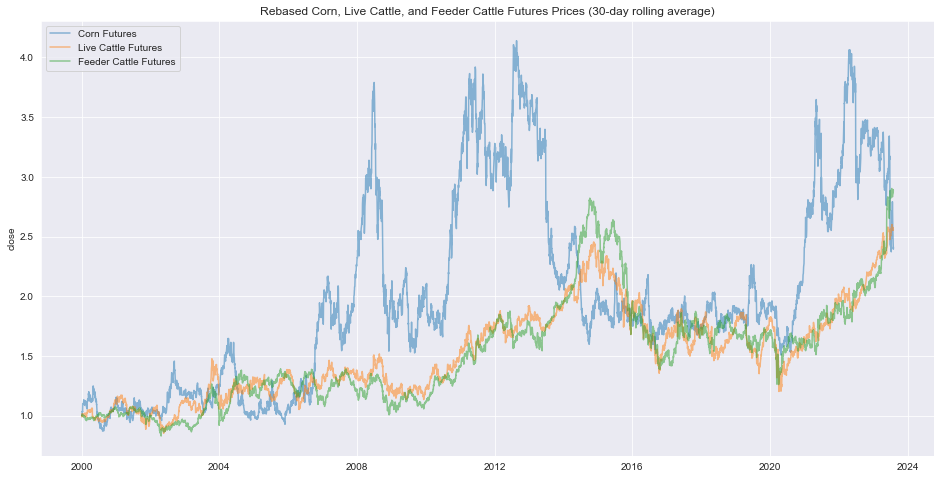

In [34]:
src.lineplot_mult_normalized(
    corn_futures,
    live_cattle_futures,
    feeder_cattle_futures,
    'Corn Futures',
    'Live Cattle Futures',
    'Feeder Cattle Futures',
    title="Rebased Corn, Live Cattle, and Feeder Cattle Futures Prices (30-day rolling average)",
    )

In [35]:
round(corn_futures.corr(live_cattle_futures),2)

0.61

- Corn has a positive correlation with live cattle on a daily basis
- However visually seems like whenever corn price crashes, cattle prices rally
    - Feeder rally makes sense, as more of the feedlot cost budget can go towards the this other input cost
    - However, a rally in live cattle doesn't make sense

In [36]:
round(corn_futures.corr(feeder_cattle_futures),2)

0.48

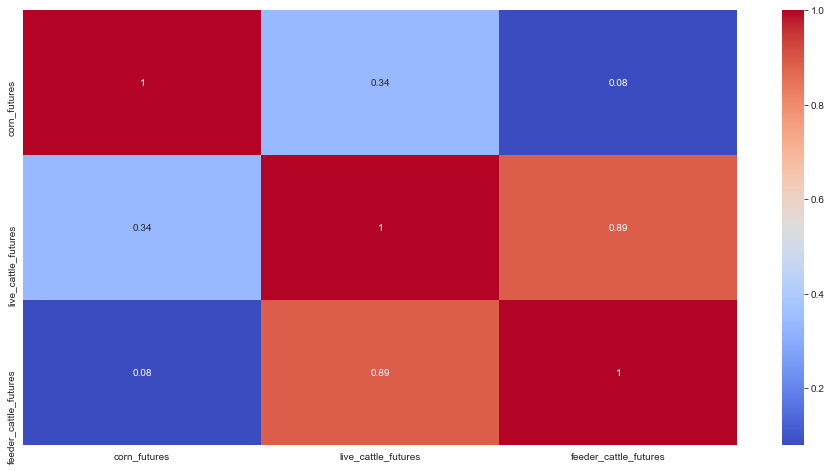

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.concat([
    corn_futures.resample('Y').mean().pct_change(),
    live_cattle_futures.resample('Y').mean().pct_change(),
    feeder_cattle_futures.resample('Y').mean().pct_change()
    ], axis=1)

df.columns = ['corn_futures', 'live_cattle_futures', 'feeder_cattle_futures']

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

- On a yearly basis:
    - live and feeder cattle highly correlated
    - live and corn have a weak correlation
    - feeder and corn have barely any correlation

No handles with labels found to put in legend.


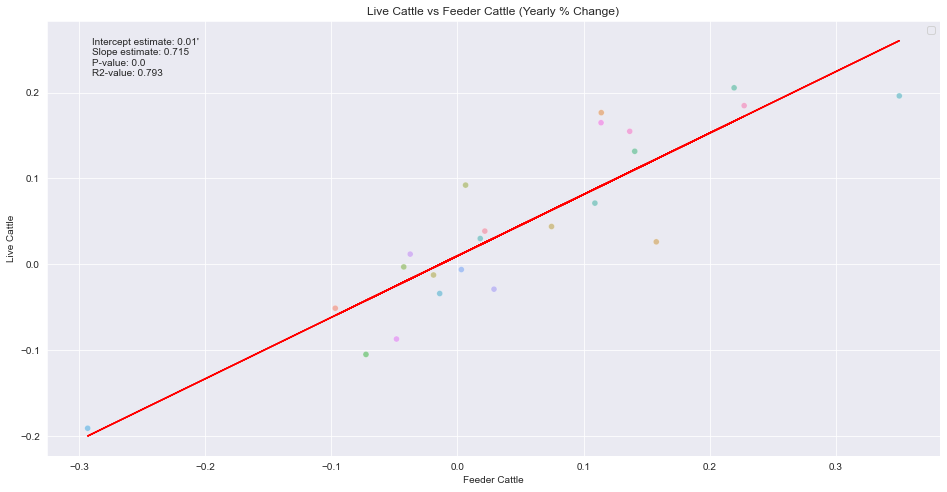

In [38]:
src.scatterplot(
    live_cattle_futures.resample('Y').mean().pct_change(),
    feeder_cattle_futures.resample('Y').mean().pct_change(),
    'Live Cattle',
    'Feeder Cattle',
    title='Live Cattle vs Feeder Cattle (Yearly % Change)',
    reg=True
)

No handles with labels found to put in legend.


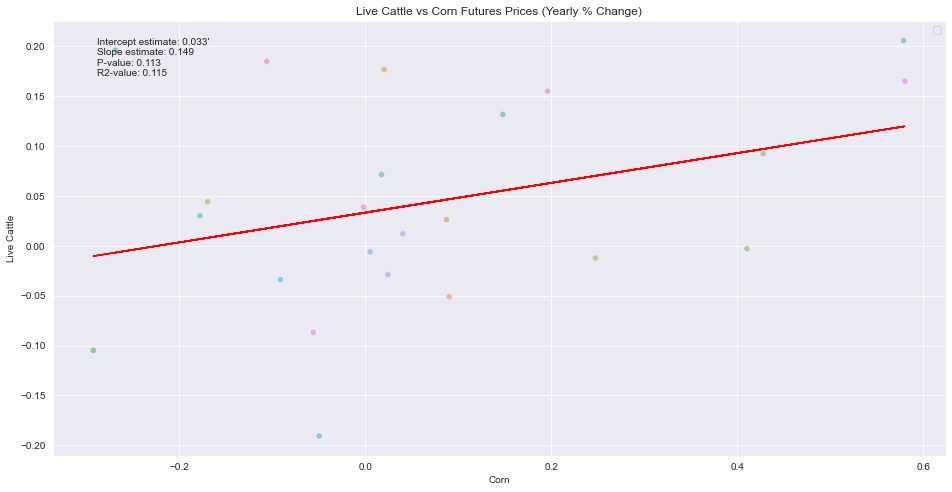

In [39]:
src.scatterplot(
    live_cattle_futures.resample('Y').mean().pct_change(),
    corn_futures.resample('Y').mean().pct_change(),
    'Live Cattle',
    'Corn',
    title='Live Cattle vs Corn Futures Prices (Yearly % Change)',
    reg=True
)

No handles with labels found to put in legend.


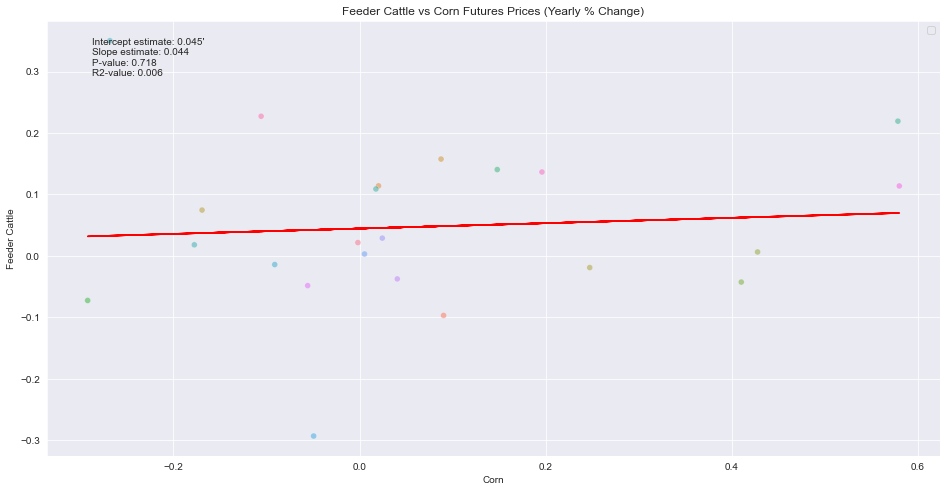

In [40]:
src.scatterplot(
    feeder_cattle_futures.resample('Y').mean().pct_change(),
    corn_futures.resample('Y').mean().pct_change(),
    'Feeder Cattle',
    'Corn',
    title='Feeder Cattle vs Corn Futures Prices (Yearly % Change)',
    reg=True
)

In [41]:
import statsmodels.api as sm


tmp = {'Y': 'Yearly', 'M': 'Monthly', 'D': 'Daily'}

for freq in ['Y', 'M', 'D']:
        
    print(f'\n\nRegression Results for {tmp[freq]} Data\n\n')
    df = pd.concat([
        live_cattle_futures.resample(freq).mean().pct_change(),
        feeder_cattle_futures.resample(freq).mean().pct_change(),
        corn_futures.resample(freq).mean().pct_change()
        ],
        keys=['live_cattle_futures_pct_chg', 'feeder_cattle_futures_pct_chg', 'corn_futures_pct_chg'],
        axis=1
    )
    df = df.dropna()

    model = sm.OLS(df.iloc[:,0], sm.add_constant(df.iloc[:,1:])).fit()

    print(model.summary())

    print('\n\n')




Regression Results for Yearly Data


                                 OLS Regression Results                                
Dep. Variable:     live_cattle_futures_pct_chg   R-squared:                       0.865
Model:                                     OLS   Adj. R-squared:                  0.852
Method:                          Least Squares   F-statistic:                     64.11
Date:                         Sat, 16 Sep 2023   Prob (F-statistic):           2.00e-09
Time:                                 19:24:46   Log-Likelihood:                 42.462
No. Observations:                           23   AIC:                            -78.92
Df Residuals:                               20   BIC:                            -75.52
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                                    coef    std err          t      P>|t|      [0

- Yearly regression: most of live cattle price is explained by feeder and corn (r-squared 0.87)
    - Feeder coefficient is 0.70, corn's is 0.12
- Monthly regression: majority of variation in live cattle price is not explained (r-squared drops to 0.36)
    - However coefficients still remain similar at 0.64 and 0.09 respectively
- Daily regression: r-squared decreases slightly to 0.31
    - Coefficients for feeder and corn still remain similar at 0.59 and 0.07